# oveview
> svm 需要解决以下四个问题,
1. 对于分类问题硬边界优化函数的建立、对偶问题的建立、模型的求解,
2. 软边界的加入，损失函数以及简单化处理，模型的求解,
3. 核函数的加入，模型的求解,
4. 对于拟合问题优化函数的建立、对偶问题的建立、模型的求解,

> svm 需要理解的几个重要超参数,
1. 软边界中的正则化常数$C$ 以及模型超参数中未出现的松弛变量$\xi$,
2. 核函数名称，核函数维度\n",
3. 对于SVR而言，还要确定边界参数$\epsilon$,

> svm 注意事项,
1. 不适合有部分残缺的数据集,
2. 过度升维可能会导致过拟合现象,
3. 极度依赖数据本身的范围，使用前最好进行标准化处理

# hard-margin model
## mathmatical background
> special analytic geometry
$$
    d = \frac{|\omega^T \cdot x + b|}{||\omega||}
$$

> to make sure each data point are assigned to correct class, label and predict value should be of the same sign\n",

$$
    y_i(\omega^T \cdot x_i + b) \ge 1
$$

> where 1 here is set as hard-margin, which is for the sake of calculation simplicity\n",
> here, we assume $\omega^T \cdot x + b$ set to be 1, distance between to support vectors should be:

$$
    \frac{2}{||\omega||}
$$

> then optimization problem is:

$$
\begin{array}{ll}
\mathop{\arg\max}\limits_{\omega}  & \frac{2}{||\omega||} \\
s.t. & y_i(\omega^T \cdot x_i + b) \ge 1 \space,\space i = 1,2,\dots n
\end{array}
$$

> which could be transferred to

$$
\begin{array}{ll}
\mathop{\arg\min}\limits_{\omega}  & \frac{1}{2}{||\omega||}^2 \\
s.t. & y_i(\omega^T \cdot x_i + b) \ge 1 \space,\space i = 1,2,\dots n,
\end{array}
$$

## mathmatical derivation
> Lagrange multiplier method

$$
    L(\omega, b, \alpha) = \frac{1}{2}{||\omega||}^2 + \sum_{i=1}^{n}{\alpha_i[1-y_i(\omega^T \cdot x + b)]}
$$

> kkt condition:

$$
\left\{
\begin{array}{ll}
\alpha_i & \\ge & 0 \\
y_i(\omega^T \cdot x + b) - 1 & \ge & 0 \\
\alpha_i \cdot [y_i(\omega^T \cdot x + b) - 1] & = & 0
\end{array}
\right .
$$

> duel problem, note that the upper bound of the optimization result of duel problem is the lower bound of the original problem

$$
\begin{array}{ll}
\mathop{\arg\max}\limits_{\alpha}  & \displaystyle\sum_{i}^{n}{\\alpha_i} - \frac{1}{2} \displaystyle\sum_{i}^{n}\displaystyle\sum_{j}^{n}{\alpha_i\alpha_jy_iy_j{x_i}^Tx_j} \\
s.t. & \displaystyle\sum_{i}^{n}{\alpha_iy_i} = 0,\space i = 1,2,\dots n \\
& \alpha_i \ge 0,\space i = 1,2,\dots n \\
\end{array}
$$

# soft-margin model
> adding penalty term punishing data points that are off-the-street of the right side of classification plane
> note that penalty term contains two main parts: 
1. regularization constant, in svm case this parameter is $C$, for larger $C$, soft-margin model will perform like one hard-margin model
2. cost function, of which independent variable is set to be some index of model, in svm case is the distance $y_i(\omega^T \cdot x_i + b)$

$$
\begin{array}{ll}
\mathop{\arg\min}\limits_{\omega} \frac{1}{2}{||\omega||}^2 + C \cdot \displaystyle\sum_{i}^{n}{l_{1/0}[1-y_i(\omega^T \cdot x_i + b)]}
\end{array}
$$

> where $l_{1/0}$ is one cost function, this function is related to parameter $\omega$ and $b$. for the sake of calculation simplicity, we introduce slack variables in replace of cost function, which could be 

$$
\begin{array}{ll}
\mathop{\arg\min}\limits_{\omega,\xi_i} & \frac{1}{2}{||\omega||}^2 + C \cdot \displaystyle\sum_{i}^{n}{\xi_i} \\
s.t. & y_i[(\omega^T \cdot x_i + b)] \ge 1- \xi_i\\
& \xi_i \ge 0 \space , \space i = 1,2, \dots, n\\
\end{array}
$$

> where $\xi_i$ could possibily be greater than 1. in this case, data point would cross the classification plane and locate on the other side of plane. comparing to hard-margin restriction condition $y_i[(\omega^T \cdot x_i + b)] \ge 1$, this condition $y_i[(\omega^T \cdot x_i + b)] \ge 1- \xi_i$ takes far-off-street points into consideratioin

> in this case, $\xi_i$ is the replacement of cost function, note that cost function is also the function of $\omega$ thus equation simplification as well as duel problem making should take $\xi_i$ into consideration

> lagrange multiplier method:

$$
   L(\omega, b, \alpha, \xi, \mu) = \frac{1}{2}{||\omega||}^2 + \sum_{i=1}^{n}{\alpha_i[1 - \xi_i - y_i(\omega^T \cdot x + b)]} - \displaystyle\sum_{i=1}^{n}{\mu_i\xi_i}
$$

> corresponding kkt condition:

$$
\left \{
\begin{array}{ll}
\alpha_i & \ge & 0 \\
y_i[(\omega^T \cdot x_i + b)] - 1 + \xi_i & \ge & 0 \\
\alpha_i \cdot [y_i(\omega^T \cdot x_i + b) - 1 + \xi_i] & = & 0 \\
\xi_i & \ge & 0 \\
\mu_i & \ge & 0 \\
\mu_i\xi_i & = & 0
\end{array}
\right .
$$

> dual problem is like:

$$\
\begin{array}{ll}
\mathop{\arg\max}\limits_{\alpha}  & \displaystyle\sum_{i}^{n}{\alpha_i} - \frac{1}{2} \displaystyle\sum_{i}^{n}\displaystyle\sum_{j}^{n}{\alpha_i\alpha_jy_iy_j{x_i}^Tx_j} \\
s.t. & \displaystyle\sum_{i}^{n}{\alpha_iy_i} = 0,\space i = 1,2,\dots n \\\
& 0 \le \alpha_i \le C ,\space i = 1,2,\dots n \\
\end{array}
$$

## linear svc
1. LinearSVC is a soft-margin model
2. two hyperparameters should be taken into consideration:
    > C - penalty factor <br>
    > loss - loss function <br>

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

iris_raw = load_iris()
# petal length, petal width
X_iris = iris_raw["data"][:,(2,3)]
# Iris-virginica
y_iris = (iris_raw['target'] == 2).astype(np.float64)

svm_clf = Pipeline(
        (("scaler",StandardScaler()),
         ("linear_svc", LinearSVC(C=1, loss="hinge"))
))
svm_clf.fit(X_iris,y_iris)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

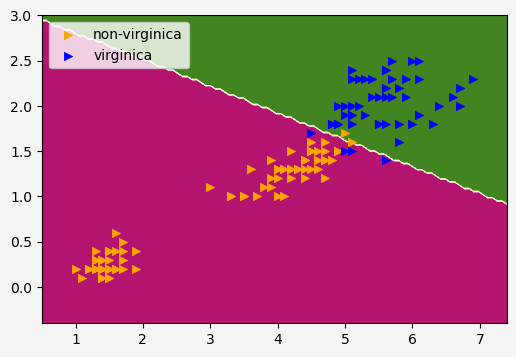

In [3]:
fig, ax = plt.subplots(1,1,figsize=(6,4),
                      facecolor='whitesmoke',
                      edgecolor='gray')
x = np.linspace(min(X_iris[:,0]-0.5),max(X_iris[:,0])+0.5,100)
y = np.linspace(min(X_iris[:,1]-0.5),max(X_iris[:,1])+0.5,100)
xx, yy = np.meshgrid(x,y)
zz = np.zeros_like(xx)
for xi in range(len(xx)):
    for yi in range(len(yy)):
        zz[xi,yi] = svm_clf.predict([[xx[xi,yi],yy[xi,yi]]])

X_1 = X_iris[y_iris.astype(np.bool8)] 
X_0 = X_iris[~y_iris.astype(np.bool8)]
        
ax.contourf(xx,yy,zz,cmap=plt.cm.PiYG)
ax.scatter(X_0[:,0],X_0[:,1],marker=">",color="orange",lw=.5,label="non-virginica")
ax.scatter(X_1[:,0],X_1[:,1],marker=">",color="blue",lw=.5,label="virginica")
ax.legend(loc="best")
plt.show()

## non-linear svc
1. in this case, we use PolynomialFeatures to "proliferate" input features, this means making input data a higher dimensional vector, hyperplane for svm is already set in the beginning phase, no need for kernel transformation

2. important hyperparameters are:
    > kernel <br>
    > degree <br>
    > C <br>
    > coef0 and gamma are for 'ploy' 'sigmoid' and 'rbf' kernel <br>
    > decision_function_shape: 'ovo' or 'ovr'(default) <br>

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

X_moon1, y_moon1 = make_moons(n_samples=100, noise=.5)
polynomial_svm_clf = Pipeline((
        ("poly_features",PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge",max_iter=10000))
))

polynomial_svm_clf.fit(X_moon1,y_moon1)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))])

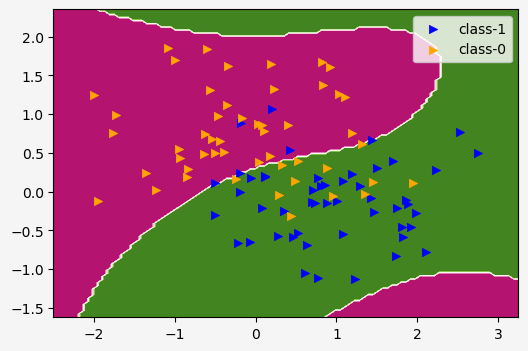

In [5]:
import numpy as np
import matplotlib as mlp
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

x1 = np.linspace(min(X_moon1[:,0])-0.5,max(X_moon1[:,0])+0.5, 100)
y1 = np.linspace(min(X_moon1[:,1])-0.5,max(X_moon1[:,1])+0.5, 100)

xx1, yy1 = np.meshgrid(x1,y1)
zz1 = np.zeros_like(xx1)
for idx in range(len(xx1)):
    for idy in range(len(yy1)):
        zz1[idx,idy] = polynomial_svm_clf.predict([[xx1[idx,idy],yy1[idx,idy]]])

X_moon_11 = X_moon1[y_moon1.astype(np.bool8)]
X_moon_10 = X_moon1[~y_moon1.astype(np.bool8)]

fig, ax = plt.subplots(1,1,figsize=(6,4),
                      facecolor="whitesmoke",
                      edgecolor="gray")
ax.contourf(xx1,yy1,zz1,cmap=plt.cm.PiYG)
ax.scatter(X_moon_11[:,0],X_moon_11[:,1],marker=">",color="blue",lw=.5,label="class-1")
ax.scatter(X_moon_10[:,0],X_moon_10[:,1],marker=">",color="orange",lw=.5,label="class-0")
ax.legend(loc="best")

## kernel svc
1. in this case dimensional transformation takes place in optimization problem solving process.

In [6]:
from sklearn.svm import SVC

X_moon2, y_moon2 = make_moons(n_samples=100, noise=.75)

kernel_svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=10, kernel="poly",degree=3, coef0=0.1, gamma="scale"))
))
kernel_svm_clf.fit(X_moon2,y_moon2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, coef0=0.1, kernel='poly'))])

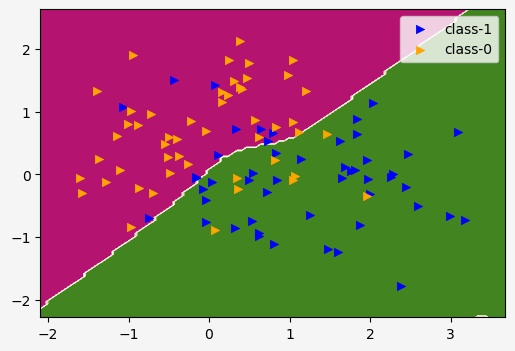

In [8]:
x2 = np.linspace(min(X_moon2[:,0])-0.5,max(X_moon2[:,0])+0.5, 100)
y2 = np.linspace(min(X_moon2[:,1])-0.5,max(X_moon2[:,1])+0.5, 100)

xx2, yy2 = np.meshgrid(x2,y2)
zz2 = np.zeros_like(xx2)
for idx in range(len(xx2)):
    for idy in range(len(yy2)):
        zz2[idx,idy] = kernel_svm_clf.predict([[xx2[idx,idy],yy2[idx,idy]]])

X_moon_21 = X_moon2[y_moon2.astype(np.bool8)]
X_moon_20 = X_moon2[~y_moon2.astype(np.bool8)]

fig, ax = plt.subplots(1,1,figsize=(6,4),
                      facecolor="whitesmoke",
                      edgecolor="gray")
ax.contourf(xx2,yy2,zz2,cmap=plt.cm.PiYG)
ax.scatter(X_moon_21[:,0],X_moon_21[:,1],marker=">",color="blue",lw=.5,label="class-1")
ax.scatter(X_moon_20[:,0],X_moon_20[:,1],marker=">",color="orange",lw=.5,label="class-0")
ax.legend(loc="best")
plt.show()

# kernel function
> raise dimensionality, yet the inner product result of a high dimensional space can be represented by a vector of the original space
> kernal function are delicately designed to meet the aforementioned condition"

## tweaking hyperparameters
1. 4 parameters are important for kernel tranformation
    > kernel : choose from sigmoid, linear, poly, rbf, rbf is most recommended <br>
    > coef0 : weight on higher power terms <br>
    > degree: works for poly, target dimensions <br>
    > gamma : works for rbf, calculate gamma <br>

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons

X_grid, y_grid = make_moons(n_samples=100, noise=.2)
grid_svc = SVC()
svm_param_grid=[
    {"C":[5,10,20],"degree":[3,5,8,10],"coef0":[.2,.5,.8,1],"kernel":["poly"]},
    {"C":[1000,10,0.01],"gamma":[5,1,0.1,0.01,0.001],"kernel":["rbf"]},
]
svc_grid_search = GridSearchCV(grid_svc,svm_param_grid,
                              cv=5,scoring="neg_mean_squared_error")
svc_grid_search.fit(X_grid, y_grid)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [5, 10, 20], 'coef0': [0.2, 0.5, 0.8, 1],
                          'degree': [3, 5, 8, 10], 'kernel': ['poly']},
                         {'C': [1000, 10, 0.01],
                          'gamma': [5, 1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [14]:
svc_grid_search.best_estimator_

SVC(C=5, coef0=0.5, degree=8, kernel='poly')

In [9]:
def svm_subplot(model, X, y, xx, yy, ax, x_pos, y_pos, title):
    '''
    @parameters
    -------------------
    model: pre-trained model 
    X: raw data, in this case is X_grid (100,2)
    y: raw target, in this case is y_grid (100,)
    xx: meshgrid x
    yy: meshgrid y
    ax: axis instance built from plt.subplots()
    x_pos: row index of ax
    y_pos: column index of ax
    title: title for this ax
    '''
    X_1 = X[y.astype(np.bool8)]
    X_0 = X[~y.astype(np.bool8)]
    zz = np.zeros_like(xx)
    for idx in range(len(xx)):
        for idy in range(len(yy)):
            zz[idx,idy] = model.predict([[xx[idx,idy],yy[idx,idy]]])
    ax[x_pos,y_pos].contourf(xx,yy,zz,cmap=plt.cm.PiYG)
    ax[x_pos,y_pos].scatter(X_1[:,0],X_1[:,1],marker=">",color="blue",lw=.5,label="class-1")
    ax[x_pos,y_pos].scatter(X_0[:,0],X_0[:,1],marker=">",color="orange",lw=.5,label="class-0")
    ax[x_pos,y_pos].legend(loc="best")
    ax[x_pos,y_pos].set_title(title)

## polynomial kernel

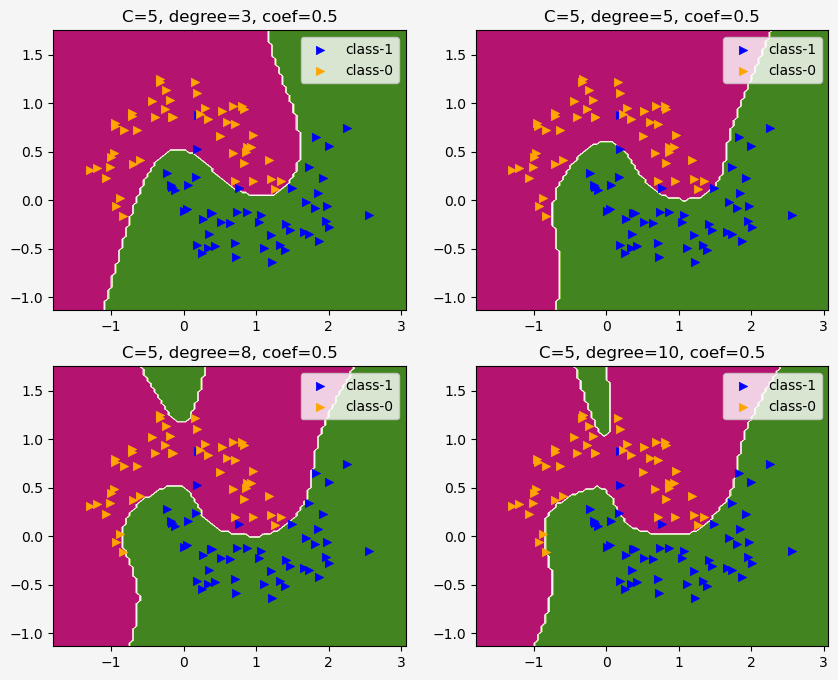

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

X_grid, y_grid = make_moons(n_samples=100, noise=.2)

x = np.linspace(min(X_grid[:,0])-0.5,max(X_grid[:,0])+0.5, 100)
y = np.linspace(min(X_grid[:,1])-0.5,max(X_grid[:,1])+0.5, 100)
xx, yy = np.meshgrid(x,y)

fig, ax = plt.subplots(2,2,figsize=(10,8),
                      facecolor="whitesmoke",
                      edgecolor="gray")
# degree 3
kernel_svm_clf_1 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=5, kernel="poly",degree=3, coef0=0.5))
))
kernel_svm_clf_1.fit(X_grid,y_grid)
svm_subplot(kernel_svm_clf_1,X_grid,y_grid,xx,yy,ax,
            x_pos=0,y_pos=0,title="C=5, degree=3, coef=0.5")
# degree 5
kernel_svm_clf_2 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=5, kernel="poly",degree=5, coef0=0.5))
))
kernel_svm_clf_2.fit(X_grid,y_grid)
svm_subplot(kernel_svm_clf_2,X_grid,y_grid,xx,yy,ax,
            x_pos=0,y_pos=1,title="C=5, degree=5, coef=0.5")
# degree 8
kernel_svm_clf_3 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=5, kernel="poly",degree=8, coef0=0.5))
))
kernel_svm_clf_3.fit(X_grid,y_grid)
svm_subplot(kernel_svm_clf_3,X_grid,y_grid,xx,yy,ax,
            x_pos=1,y_pos=0,title="C=5, degree=8, coef=0.5")
# degree 10
kernel_svm_clf_4 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=5, kernel="poly",degree=10, coef0=0.5))
))
kernel_svm_clf_4.fit(X_grid,y_grid)
svm_subplot(kernel_svm_clf_4,X_grid,y_grid,xx,yy,ax,
            x_pos=1,y_pos=1,title="C=5, degree=10, coef=0.5")

## gaussian rbf kernel

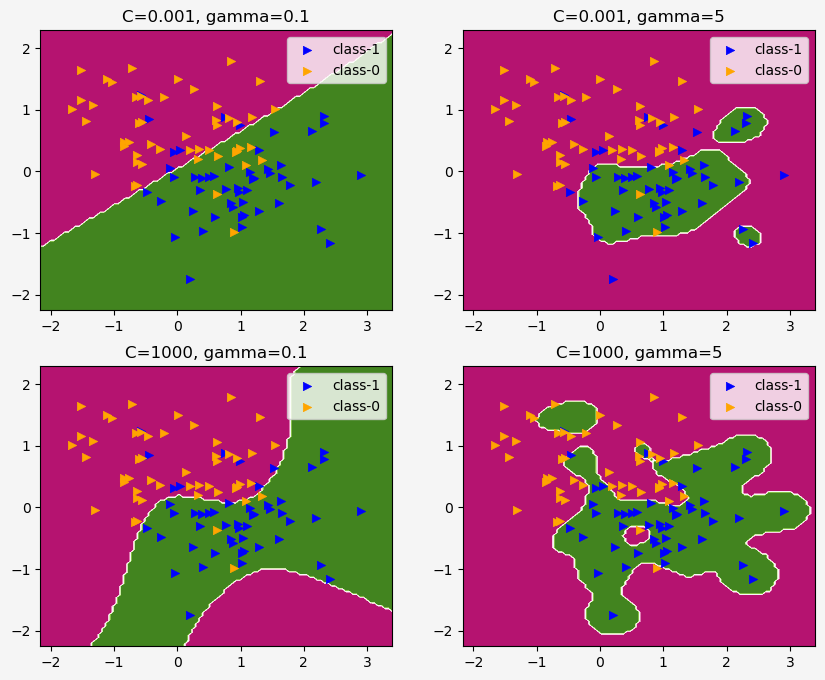

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

X_grid2, y_grid2 = make_moons(n_samples=100, noise=.5)

x = np.linspace(min(X_grid2[:,0])-0.5,max(X_grid2[:,0])+0.5, 100)
y = np.linspace(min(X_grid2[:,1])-0.5,max(X_grid2[:,1])+0.5, 100)
xx, yy = np.meshgrid(x,y)

fig, ax = plt.subplots(2,2,figsize=(10,8),
                      facecolor="whitesmoke",
                      edgecolor="gray")
# C=0.001, gamma=0.1
rbf_svm_clf_1 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=0.001, kernel="rbf",gamma=0.1))
))
rbf_svm_clf_1.fit(X_grid2,y_grid2)
svm_subplot(rbf_svm_clf_1,X_grid2,y_grid2,xx,yy,ax,
            x_pos=0,y_pos=0,title="C=0.001, gamma=0.1")
# C=0.001, gamma=5
rbf_svm_clf_2 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=0.001, kernel="rbf",gamma=5))
))
rbf_svm_clf_2.fit(X_grid2,y_grid2)
svm_subplot(rbf_svm_clf_2,X_grid2,y_grid2,xx,yy,ax,
            x_pos=0,y_pos=1,title="C=0.001, gamma=5")
# C=1000, gamma=0.1
rbf_svm_clf_3 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=1000, kernel="rbf",gamma=0.1))
))
rbf_svm_clf_3.fit(X_grid2,y_grid2)
svm_subplot(rbf_svm_clf_3,X_grid2,y_grid2,xx,yy,ax,
            x_pos=1,y_pos=0,title="C=1000, gamma=0.1")
# C=1000, gamma=5
rbf_svm_clf_4 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(C=1000, kernel="rbf",gamma=5))
))
rbf_svm_clf_4.fit(X_grid2,y_grid2)
svm_subplot(rbf_svm_clf_4,X_grid2,y_grid2,xx,yy,ax,
            x_pos=1,y_pos=1,title="C=1000, gamma=5")

# SVR
> different from SVC-SVM, regression only takes predictions that are largely diviating from target into consideration when calculating cost function(optimization problem). This margin is set as $\epsilon$
> thus, we take this cost function into practice\

$$
    l_{\epsilon}(z) = 
\left\{
\begin{array}{ll}
0& , & if |z| \le \epsilon \\
|z| - \epsilon& , & otherwise
\end{array}
\right .
$$

> then optimization problem becomes:

$$
    \mathop{\arg\min}\limits_{\omega} \frac{1}{2}{||\omega||}^2 + C \cdot \displaystyle\sum_{i}^{n}{l_{\epsilon}[(\omega^T \cdot x_i + b)-y_i]}
$$

> introduce slack variable into model:

$$
\begin{array}{ll}
\mathop{\arg\min}\limits_{\omega,\xi_i, \hat\xi_i} & \frac{1}{2}{||\omega||}^2 + C \cdot \displaystyle\sum_{i}^{n}{\xi_i + \hat\xi_i} \\
s.t.  
      & (\omega^T \cdot x_i + b)-y_i \le \epsilon + \xi_i \space,\\
      & y_i - (\omega^T \cdot x_i + b) \le \epsilon + \hat\xi_i \space,\\
      & \xi_i \ge 0 \space,\\
      &\hat\xi_i \ge 0 \space, i= 1,|2,\dots n\\
\end{array}
$$

> in this case, we just consider $l_{\epsilon}[(\omega^T \cdot x_i + b)-y_i]$ as two inequality constrains
> thus duel problem is like:

$$
\begin{array}{ll}
     \mathop{\arg\max}\limits_{\alpha,\hat\alpha} & \sum_{i=1}^{n}{y_i(\hat\alpha_i - \alpha_i)-\epsilon(\hat\alpha_i - \alpha_i)} - \frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n}{(\hat\alpha_i - \alpha_i)(\hat\alpha_j - \alpha_j){x_i}^Tx_j} \\
    s.t. & \sum_{i=1}^{n}{(\hat\alpha_i - \alpha_i)=0} \\
    & 0 \le \alpha_i , \hat\alpha_i \le C
\end{array}
$$ 

> the corresponding kkt conditions are:

$$
\left \{
\begin{array}{ll}
    & \alpha_i(\omega^T \cdot x_i + b -y_i - \epsilon - \xi_i) = 0 \\
    & \hat\alpha_i(\omega^T \cdot x_i + b -y_i - \epsilon - \hat\xi_i) = 0 \\
    & \alpha_i \hat\alpha_i = 0 \\
    & \xi_i\hat\xi_i = 0 \\
    & (C - \alpha_i)\xi_i = 0 \\
    & (C - \hat\alpha_i)\hat\xi_i = 0 \\
\end{array}
\right .
$$

> as results, we could calculate each $\mathbf{\omega}$ with $\alpha, \hat\alpha$:

$$
    \mathbf{\omega} = \sum_{i=1}^{n}{(\hat\alpha_i - \alpha_i)\mathbf{x_i}}
$$

> for scalar $b$, we could find several $\mathbf{x}$, then calculate the mean value for $b$ according to this formula:

$$
    b = y_i + \epsilon - \sum_{j=1}^{n}{(\hat\alpha_j - \alpha_j)\mathbf{x_j}^T \mathbf{x_i}}
$$

> * where $\mathbf{x_j}$ is the data points who meet $0<\alpha_i<C$ condition, and $\mathbf{x_i}$ are a ramdom data point

## linear svr
1. for svr, there's only one additional hyperparameter: $\epsilon$
2. two different SVR model
    > LinearSVR - only takes epsilon hyperparameter, could customize loss function <br>
    > SVR - takes more hyperparameters, could apply kernel trick

In [1]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline


X_svr = np.linspace(-50,50,100)
y_svr = 0.2 * np.power(X_svr,3) + 0.7 * np.power(X_svr,2) - 1.2

In [12]:
def plot_svc(model, X, y, ax, x_pos, y_pos, title):
    '''
    @Parameters
    ----------------------------------
    model: svc model
    X: raw data
    y: raw target
    ax: axis instance of plt
    x_pos: row position in axis
    y_pos: column position in axis
    title: title of axis
    '''
    X_range = np.linspace(min(X)-0.5, max(X)+0.5, 110)
    y_range = model.predict(X_range.reshape(-1,1))
    ax[x_pos,y_pos].scatter(X, y, lw=.1, marker=".", color='blue',label='raw data')
    ax[x_pos,y_pos].plot(X_range, y_range, ls= '-', lw=1, color="red", label="svr regression")
    ax[x_pos,y_pos].set_title(title)
    ax[x_pos,y_pos].legend(loc='best')
    ax[x_pos,y_pos].grid(alpha=0.5)

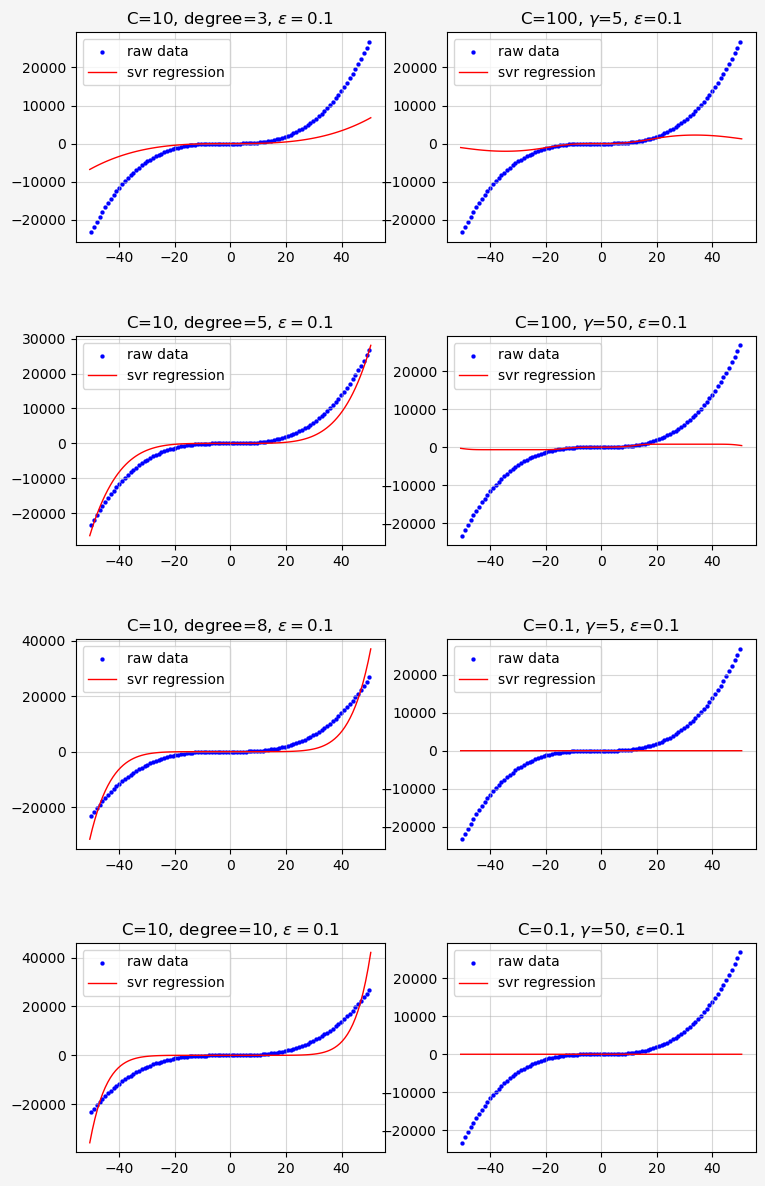

In [3]:
fig, ax = plt.subplots(4,2,figsize=(8,16),
                     facecolor='whitesmoke',
                     edgecolor='gray')
plt.subplots_adjust(left=0.09, bottom=0.20, 
                    right=0.94, top=0.90, 
                    wspace=.2, hspace=.45)
# SVR wit polynomial kernel
##########################################
# degree=3
linsvr_reg_1= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=10,degree=3,coef0=0.1,epsilon=0.1,kernel="poly"))
))
linsvr_reg_1.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(linsvr_reg_1,X_svr,y_svr,ax,
        x_pos=0, y_pos=0, title=r"C=10, degree=3, $\epsilon=0.1$")
# degree=5
linsvr_reg_2= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=10,degree=5,coef0=0.1,epsilon=0.1,kernel="poly"))
))
linsvr_reg_2.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(linsvr_reg_2,X_svr,y_svr,ax,
        x_pos=1, y_pos=0, title=r"C=10, degree=5, $\epsilon=0.1$")
# degree=8
linsvr_reg_3= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=10,degree=8,coef0=0.1,epsilon=0.1,kernel="poly"))
))
linsvr_reg_3.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(linsvr_reg_3,X_svr,y_svr,ax,
        x_pos=2, y_pos=0, title=r"C=10, degree=8, $\epsilon=0.1$")
# degree=10
linsvr_reg_4= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=10,degree=10,coef0=0.1,epsilon=0.1,kernel="poly"))
))
linsvr_reg_4.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(linsvr_reg_4,X_svr,y_svr,ax,
        x_pos=3, y_pos=0, title=r"C=10, degree=10, $\epsilon=0.1$")
# SVR wit Gaussian rbf kernel
##########################################
# C=100, gamma=5
rbfsvr_reg_1= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=100,gamma=5,epsilon=0.1,kernel="rbf"))
))
rbfsvr_reg_1.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(rbfsvr_reg_1,X_svr,y_svr,ax,
        x_pos=0, y_pos=1, title=r"C=100, $\gamma$=5, $\epsilon$=0.1")
# C=100, gamma=50
rbfsvr_reg_2= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=100,gamma=50,epsilon=0.1,kernel="rbf"))
))
rbfsvr_reg_2.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(rbfsvr_reg_2,X_svr,y_svr,ax,
        x_pos=1, y_pos=1, title=r"C=100, $\gamma$=50, $\epsilon$=0.1")
# C=0.1, gamma=5
rbfsvr_reg_3= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=0.1,gamma=5,epsilon=0.1,kernel="rbf"))
))
rbfsvr_reg_3.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(rbfsvr_reg_3,X_svr,y_svr,ax,
        x_pos=2, y_pos=1, title=r"C=0.1, $\gamma$=5, $\epsilon$=0.1")
# C=0.1, gamma=50
rbfsvr_reg_4= Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", SVR(C=0.1,gamma=50,epsilon=0.1,kernel="rbf"))
))
rbfsvr_reg_4.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(rbfsvr_reg_4,X_svr,y_svr,ax,
        x_pos=3, y_pos=1, title=r"C=0.1, $\gamma$=50, $\epsilon$=0.1")

(100, 1)


/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 1)

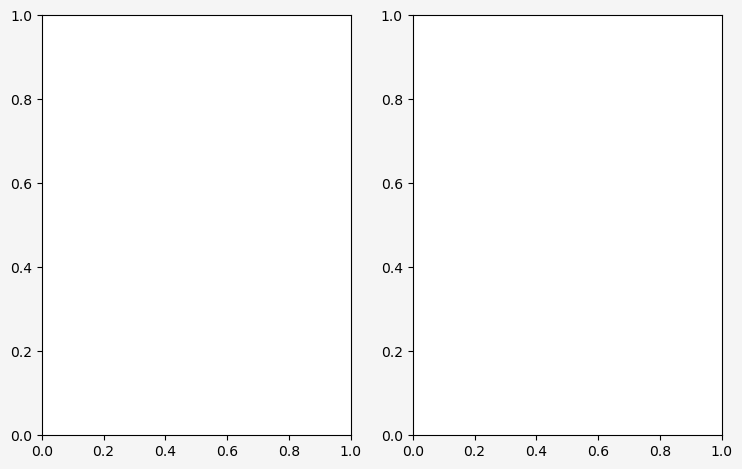

In [30]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(8,6),
                     facecolor='whitesmoke',
                     edgecolor='gray')
plt.subplots_adjust(left=0.09, bottom=0.20, 
                    right=0.94, top=0.90, 
                    wspace=.2, hspace=.2)
svr_reg_1 = Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", LinearSVR(C=10,epsilon=0.1,loss="hinge"))
))
svr_reg_1.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(svr_reg_1,X_svr,y_svr,ax,
        x_pos=0, y_pos=0, title=r"C=10, $\epsilon$=0.1")

svr_reg_2 = Pipeline((
        ("scaler", StandardScaler()),
        ("svr_regressor", LinearSVR(C=10,epsilon=1,loss="hinge"))
))
svr_reg_2.fit(X_svr.reshape(-1,1), y_svr)
plot_svc(svr_reg_2,X_svr,y_svr,ax,
        x_pos=0, y_pos=1, title=r"C=10, $\epsilon$=1")